In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from collections import defaultdict
import numpy as np
%matplotlib inline

In [2]:
root_folder = os.getcwd()
data_file = os.path.join(root_folder, '../src/CanadaUSA.txt')
scenarioFolder = '../results/Scenarios/'
scenarioFiles = ['ER0TC0','ER0TC30','ER50TC0','ER50TC30','ER100TC0','ER100TC30']

In [3]:
lines = []
with open(data_file, 'r') as f1:
    for line in f1:
        if not line.startswith(('set MODEper','set MODEx')):
            lines.append(line)
            
with open(data_file, 'w') as f2:
    f2.writelines(lines)
    
parsing = False

data_all = []
data_out = []
data_inp = []

output_table = []
input_table = []

year_list = []
fuel_list = []
tech_list = []
storage_list = []
mode_list = []

with open(data_file, 'r') as f:
    for line in f:
        
        #Extracts start year
        if line.startswith('set YEAR'):
            start_year = next(f)
            year_list.append(start_year)
            parsing = True
            while parsing == True:
                year = next(f)
                if year.startswith(';'):
                    parsing = False
                else:
                    year_list.append(year)
            temp = year_list
            year_list = []
            for year in temp:
                year_list.append(year.strip())
        
        #Extracts fules
        if line.startswith('set FUEL'):
            parsing = True
            while parsing == True:
                fuel = next(f)
                if fuel.startswith(';'):
                    parsing = False
                else:
                    fuel_list.append(fuel)
            temp = fuel_list
            fuel_list = []
            for fuel in temp:
                fuel_list.append(fuel.strip())
            
        #Extracts technologies
        if line.startswith('set TECHNOLOGY'):
            parsing = True
            while parsing == True:
                tech = next(f)
                if tech.startswith(';'):
                    parsing = False
                else:
                    tech_list.append(tech)
            temp = tech_list
            tech_list = []
            for tech in temp:
                tech_list.append(tech.strip())
            
        #Extracts Storages
        if line.startswith('set STORAGE'):
            parsing = True
            while parsing == True:
                storage = next(f)
                if storage.startswith(';'):
                    parsing = False
                else:
                    storage_list.append(storage)
            temp = storage_list
            storage_list = []
            for storage in temp:
                storage_list.append(storage.strip())
            
        #Extracts Modes
        if line.startswith('set MODE_OF_OPERATION'):
            parsing = True
            while parsing == True:
                mode = next(f)
                if mode.startswith(';'):
                    parsing = False
                else:
                    mode_list.append(mode)
            temp = mode_list
            mode_list = []
            for mode in temp:
                mode_list.append(mode.strip())

with open(data_file, 'r') as f:
    for line in f:
        if line.startswith('param'):
            if line.split(' ')[4] == 'OutputActivityRatio':
                parsing = True
                while parsing == True:
                    OAR = next(f)
                    if OAR.startswith(';'):
                        parsing = False
                    else:
                        region = OAR.split(' ')[0]
                        tech = OAR.split(' ')[1]
                        fuel = OAR.split(' ')[2]
                        mode = OAR.split(' ')[3]
                        year = OAR.split(' ')[4]
                        value = OAR.split(' ')[5]
                        value = value.strip()
                        data_out.append(tuple([fuel,tech,mode]))
                        data_all.append(tuple([tech,mode]))
                        #output_table.append(tuple([region,tech,fuel,year,value]))
                        output_table.append(tuple([tech,fuel,mode,year,value]))

with open(data_file, 'r') as f:
    for line in f:
        if line.startswith('param'):
            if line.split(' ')[4] == 'InputActivityRatio':
                parsing = True
                while parsing == True:
                    IAR = next(f)
                    if IAR.startswith(';'):
                        parsing = False
                    else:
                        region = IAR.split(' ')[0]
                        tech = IAR.split(' ')[1]
                        fuel = IAR.split(' ')[2]
                        mode = IAR.split(' ')[3]
                        year = IAR.split(' ')[4]
                        value = IAR.split(' ')[5]
                        value = value.strip()
                        data_inp.append(tuple([fuel,tech,mode]))
                        data_all.append(tuple([tech,mode]))
                        #input_table.append(tuple([region,tech,fuel,year,value]))
                        input_table.append(tuple([tech,fuel,mode,year,value]))

storage_to = []
storage_from = []

with open(data_file) as f:
    for line in f:
        if line.startswith('param'):
            if line.split(' ')[4] == 'TechnologyToStorage':
                parsing = True
                while parsing == True:
                    TechToSto = next(f)
                    if TechToSto.startswith(';'):
                        parsing = False
                    else:
                        region = TechToSto.split(' ')[0]
                        tech = TechToSto.split(' ')[1]
                        storage = TechToSto.split(' ')[2]
                        mode = TechToSto.split(' ')[3]
                        value = TechToSto.split(' ')[4]
                        value = TechToSto.strip()
                        #storage_to.append(tuple([region,tech,fuel,year,value]))  
                        storage_to.append(tuple([tech,fuel,year])) 

with open(data_file) as f:
    for line in f:
        if line.startswith('param'):
            if line.split(' ')[4] == 'TechnologyToStorage':
                parsing = True
                while parsing == True:
                    TechFromSto = next(f)
                    if TechFromSto.startswith(';'):
                        parsing = False
                    else:
                        region = TechFromSto.split(' ')[0]
                        tech = TechFromSto.split(' ')[1]
                        storage = TechFromSto.split(' ')[2]
                        mode = TechFromSto.split(' ')[3]
                        value = TechFromSto.split(' ')[4]
                        value = TechFromSto.strip()
                        #storage_to.append(tuple([region,tech,fuel,year,value]))  
                        storage_from.append(tuple([tech,fuel,year])) 
            
dict_out = defaultdict(list)
dict_inp = defaultdict(list)
dict_all = defaultdict(list)
dict_stt = defaultdict(list)
dict_stf = defaultdict(list)

for f,t,m in data_out:
    dict_out[f].append((m,t))

for f,t,m in data_inp:
    dict_inp[f].append((m,t))
    
for t,m in data_all:
    if m not in dict_all[t]:
        dict_all[t].append(m)
        
for s,t,m in storage_to:
    dict_stt[s].append((m,t))

for s,t,m in storage_from:
    dict_stf[s].append((m,t))
        
# Open data file and delete line with 'end;' statement
lines = []
with open(data_file, 'r') as f1:
    for line in f1:
        if not line.startswith('end;'):
            lines.append(line)
            
with open(data_file, 'w') as f2:
    f2.writelines(lines)

In [4]:
year_split = []
for year in year_list:
    for season in ['W','S','SP','F']:
        for hour in range (1,25):
            ts = season + str(hour)
            year_split.append(tuple([ts,year,0.010417]))
df_output = pd.DataFrame(output_table, columns=['t','f','m','y','oar'])
df_output = df_output.drop(['f'],axis=1)
df_output['t']=df_output['t'].astype(str)
df_output['m']=df_output['m'].astype(int)
df_output['y']=df_output['y'].astype(int)
df_output['oar']=df_output['oar'].astype(float)
df_yearsplit = pd.DataFrame(year_split, columns=['l','y','yearSplit'])
df_yearsplit['l']=df_yearsplit['l'].astype(str)
df_yearsplit['y']=df_yearsplit['y'].astype(int)
df_yearsplit['yearSplit']=df_yearsplit['yearSplit'].astype(float)

df_OperationalLife = pd.read_csv('../src/data/OperationalLife.csv')
df_OperationalLife.rename(columns={'REGION':'r','TECHNOLOGY':'t','VALUE':'opLife'}, inplace = True)
df_ResidualCapacity = pd.read_csv('../src/data/ResidualCapacity.csv')
df_ResidualCapacity.rename(columns={'REGION':'r','TECHNOLOGY':'t','YEAR':'y','VALUE':'resCap'}, inplace = True)

df_ResidualCapacity['r'] = df_ResidualCapacity['r'].astype(str)
df_ResidualCapacity['t'] = df_ResidualCapacity['t'].astype(str)
df_ResidualCapacity['y'] = df_ResidualCapacity['y'].astype(int)

In [5]:
#Read CBC output file
roa = pd.DataFrame()
capAnnual = pd.DataFrame()

for file in scenarioFiles:
#for file in ['ER0TC0']:
    path = scenarioFolder + file + '.sol'
    df = pd.read_csv(path, sep='\t')
    df.columns = ['temp']
    df['temp'] = df['temp'].str.lstrip(' *\n\t')
    df[['temp','value']] = df['temp'].str.split(')', expand=True)
    df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)
    df['value'] = df['value'].str.split(' ', expand=True)
    df[['parameter','id']] = df['temp'].str.split('(', expand=True)
    df['parameter'] = df['parameter'].str.split(' ', expand=True)[1]
    df = df.drop('temp', axis=1)
    df['value'] = df['value'].astype(float).round(4)
    df['Scenario'] = file

    df_ROA_raw = df.loc[df['parameter']=='RateOfActivity']
    df_NewCap_raw = df.loc[df['parameter']=='NewCapacity']
    
    #####################################################################################
    
    idList = df_ROA_raw['id']
    regionList = []
    tsList = []
    techList = []
    modeList = []
    yearList = []
    valueList = df_ROA_raw['value'].astype(float)
    scenarioList = df_ROA_raw['Scenario']
    
    for item in idList:
        itemList = item.split(',')
        regionList.append(itemList[0])
        tsList.append(itemList[1])
        techList.append(itemList[2])
        modeList.append(itemList[3])
        yearList.append(itemList[4])
        
    df_ROA = pd.DataFrame(list(zip(regionList,tsList,techList,modeList,yearList,valueList,scenarioList)),
                     columns=['r','l','t','m','y','roa','scenario'])

    df_ROA['r'] = df_ROA['r'].astype(str)
    df_ROA['l'] = df_ROA['l'].astype(str)
    df_ROA['t'] = df_ROA['t'].astype(str)
    df_ROA['m'] = df_ROA['m'].astype(int)
    df_ROA['y'] = df_ROA['y'].astype(int)
        
    df_ROA = pd.merge(df_ROA, df_yearsplit, how = 'right', on=['l','y'])
    df_ROA = pd.merge(df_ROA, df_output, how = 'right', on=['t','m','y'])
    df_ROA = df_ROA.fillna(0)
    df_ROA['scenario']=file
    roa = roa.append(df_ROA)
    
    #####################################################################################
    
    idList = df_NewCap_raw['id']
    regionList = []
    techList = []
    yearList = []
    valueList = df_NewCap_raw['value']
    scenarioList = df_NewCap_raw['Scenario']
    
    for item in idList:
        itemList = item.split(',')
        regionList.append(itemList[0])
        techList.append(itemList[1])
        yearList.append(itemList[2])
        
    df_NewCap = pd.DataFrame(list(zip(regionList,techList,yearList,valueList,scenarioList)),
                     columns=['r','t','y','newCap','scenario'])
    
    df_NewCap['r'] = df_NewCap['r'].astype(str)
    df_NewCap['t'] = df_NewCap['t'].astype(str)
    df_NewCap['y'] = df_NewCap['y'].astype(int)
    
    df_Tot_Cap = pd.merge(df_NewCap, df_ResidualCapacity, how = 'right', on=['r','t','y'])
    df_Tot_Cap = pd.merge(df_Tot_Cap, df_OperationalLife, how = 'left', on=['r','t'])
    df_Tot_Cap = df_Tot_Cap.fillna(0)
    df_Tot_Cap['scenario']=file
    capAnnual = capAnnual.append(df_Tot_Cap)
    print(file)
    

ER0TC0
ER0TC30
ER50TC0
ER50TC30
ER100TC0
ER100TC30


In [6]:
roa

,r,l,t,m,y,roa,scenario,yearSplit,oar
0,NAmerica,W1,RNWHYDCANAT,1,2019,172.2110,ER0TC0,0.010417,1.0
1,NAmerica,W2,RNWHYDCANAT,1,2019,154.6893,ER0TC0,0.010417,1.0
2,NAmerica,W3,RNWHYDCANAT,1,2019,167.2721,ER0TC0,0.010417,1.0
3,NAmerica,W4,RNWHYDCANAT,1,2019,172.0124,ER0TC0,0.010417,1.0
4,NAmerica,W5,RNWHYDCANAT,1,2019,172.0786,ER0TC0,0.010417,1.0
...,...,...,...,...,...,...,...,...,...
497400,NAmerica,F20,TRNCANATUSANE,2,2050,0.0000,ER100TC30,0.010417,1.0
497401,NAmerica,F21,TRNCANATUSANE,2,2050,0.0000,ER100TC30,0.010417,1.0
497402,NAmerica,F22,TRNCANATUSANE,2,2050,0.0000,ER100TC30,0.010417,1.0
497403,NAmerica,F23,TRNCANATUSANE,2,2050,0.0000,ER100TC30,0.010417,1.0


In [7]:
# table ProductionByTechnologyAnnual
#    r~REGION, t~TECHNOLOGY, f~FUEL, y~YEAR,
#    sum{l in TIMESLICE, m in MODEperTECHNOLOGY[t]: OutputActivityRatio[r,t,f,m,y] <> 0}
#        RateOfActivity[r,l,t,m,y] * OutputActivityRatio[r,t,f,m,y] * YearSplit[l,y] ~VALUE;

df_roa= roa.copy()
region = 'NAmerica'
techList = list(set(df_Tot_Cap['t'].tolist()))
for tech in techList:
    if tech.startswith('TRN') or tech.startswith('MIN') or tech.startswith('RNW'):
        techList.remove(tech)

outData = []
df_Total_Annual_ROA = pd.DataFrame()
for file in scenarioFiles:
#for file in ['ER100TC0']:
    outData = []
    for tech in techList:
        df_tech = df_roa.loc[(df_roa['t']==tech) & 
                             (df_roa['scenario']==file) & 
                             (df_roa['y']==2050)]
        prodList = df_tech['roa']*df_tech['yearSplit']*df_tech['oar']
        outData.append([region,tech,year,prodList.sum(),file])
    dfTemp = pd.DataFrame(outData, columns = ['r','t','y','Production','Scenario'])
    df_Total_Annual_ROA = df_Total_Annual_ROA.append(dfTemp)
    print(file)

ER0TC0
ER0TC30
ER50TC0
ER50TC30
ER100TC0
ER100TC30


In [8]:
# TotalCapacityAnnual
#    r~REGION, t~TECHNOLOGY, y~YEAR,
#    ResidualCapacity[r,t,y] +
#    (sum{yy in YEAR: y-yy < OperationalLife[r,t] && y-yy>=0}
#        NewCapacity[r,t,yy])~VALUE;
df_Tot_Cap = capAnnual.copy()
df_Tot_Cap['DecomissionYear'] = df_Tot_Cap['y'] + df_Tot_Cap['opLife']
region = 'NAmerica'
techList = list(set(df_Tot_Cap['t'].tolist()))
outData = []
df_Total_Annual_Capacity = pd.DataFrame()

for file in scenarioFiles:
#for file in ['ER100TC0']:
    outData = []
    for tech in techList:
        df_tech = df_Tot_Cap.loc[df_Tot_Cap['t']==tech]
        df_tech = df_tech.loc[df_tech['scenario']==file]
        df_tech = df_tech.set_index('y')
        totalCaps = df_tech.to_dict()['resCap']
        year_list_ints = [int(i) for i in year_list]
        for year in year_list_ints:
            newCapacity = df_tech.loc[year,'newCap']
            if df_tech.loc[year,'DecomissionYear'] > 2050:
                end_year = 2050
            else:
                end_year = df_tech.loc[year,'DecomissionYear']
            yearIndex = year
            while yearIndex < (end_year + 1):
                capacity = totalCaps[yearIndex] + newCapacity
                totalCaps.update({yearIndex:capacity})
                yearIndex += 1
        for year in year_list_ints:
            outData.append([region,tech,year,totalCaps[year],file])
        
    dfTemp = pd.DataFrame(outData, columns = ['r','t','y','TotalCapacityAnnual','Scenario'])
    df_Total_Annual_Capacity = df_Total_Annual_Capacity.append(dfTemp)

In [9]:
df_Total_Annual_Capacity

,r,t,y,TotalCapacityAnnual,Scenario
0,NAmerica,TRNCANUSANY,2019,2.32,ER0TC0
1,NAmerica,TRNCANOTUSANY,2020,2.32,ER0TC0
2,NAmerica,TRNCANOTUSANY,2021,2.32,ER0TC0
3,NAmerica,TRNCANOTUSANY,2022,2.32,ER0TC0
4,NAmerica,TRNCANOTUSANY,2023,2.32,ER0TC0
...,...,...,...,...,...
5787,NAmerica,PWRSPVCANQC01,2046,0.00,ER100TC30
5788,NAmerica,PWRSPVCANQC01,2047,0.00,ER100TC30
5789,NAmerica,PWRSPVCANQC01,2048,0.00,ER100TC30
5790,NAmerica,PWRSPVCANQC01,2049,0.00,ER100TC30


In [10]:
df_Emission_activity  = pd.read_csv('../src/data/EmissionActivityRatio.csv')
df_Emission_activity.rename(columns={'REGION':'r','TECHNOLOGY':'t','EMISSION':'e','MODE_OF_OPERATION':'m','YEAR':'y','VALUE':'EmissionActivityRatio'}, inplace = True)
df_Emission_activity['y'] = df_Emission_activity['y'].astype(int)
df_Emission_activity['m'] = df_Emission_activity['m'].astype(int)
df_Emission_activity['t'] = df_Emission_activity['t'].astype(str)
df_Emission_activity['EmissionActivityRatio'] = df_Emission_activity['EmissionActivityRatio'].astype(float)

In [11]:
roa_emission = roa.copy()
df_emission = pd.merge(roa_emission, df_Emission_activity, on=['r','t','y','m'] )
df_emission = df_emission.drop('oar',axis=1)
df_emission['AnnualTechnologyEmission'] = df_emission['EmissionActivityRatio'] * df_emission['yearSplit'] * df_emission['roa']
df_emission = df_emission.drop(['yearSplit', 'roa', 'EmissionActivityRatio'], axis=1)
df_emission = df_emission.groupby(['r','t','y','scenario'])['AnnualTechnologyEmission'].sum().reset_index()

In [12]:
def tradeCapResults(df, scenario):
    df = df.loc[df['Scenario']==scenario]
    df = df.loc[(df['t'].str.startswith('TRN')) & 
                (df['y'] == 2050)]
    df['StartRegion'] = df['t'].str[3:6]
    df['EndRegion'] = df['t'].str[8:11]
    canTrade = df.loc[(df['StartRegion']=='CAN') & 
                      (df['EndRegion']=='CAN')]
    usaTrade = df.loc[(df['StartRegion']=='USA') & 
                      (df['EndRegion']=='USA')]
    intTrade = df.loc[(df['StartRegion']=='CAN') & 
                      (df['EndRegion']=='USA')]
    outList = [canTrade['TotalCapacityAnnual'].sum(),
               usaTrade['TotalCapacityAnnual'].sum(),
               intTrade['TotalCapacityAnnual'].sum()]
    return outList

In [13]:
# Trade Capacity
dfTrade = df_Total_Annual_Capacity.copy()
ER0TC0 = tradeCapResults(dfTrade, 'ER0TC0')
ER0TC30 = tradeCapResults(dfTrade, 'ER0TC30')
ER50TC0 = tradeCapResults(dfTrade, 'ER50TC0')
ER50TC30 = tradeCapResults(dfTrade, 'ER50TC30')
ER100TC0 = tradeCapResults(dfTrade, 'ER100TC0')
ER100TC30 = tradeCapResults(dfTrade, 'ER100TC30')

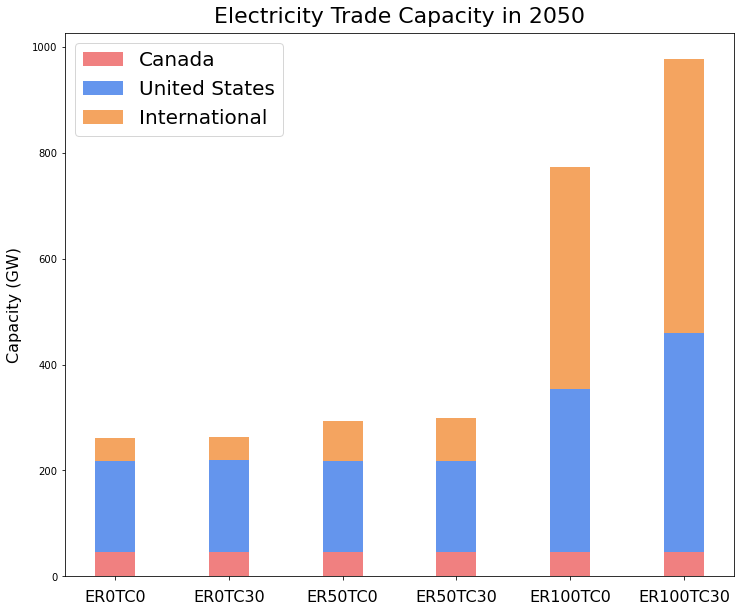

In [14]:
labels = scenarioFiles
canValues = [ER0TC0[0],
             ER0TC30[0],
             ER50TC0[0],
             ER50TC30[0],
             ER100TC0[0],
             ER100TC30[0],
            ]
usaValues = [ER0TC0[1],
             ER0TC30[1],
             ER50TC0[1],
             ER50TC30[1],
             ER100TC0[1],
             ER100TC30[1],
            ]
intValues = [ER0TC0[2],
             ER0TC30[2],
             ER50TC0[2],
             ER50TC30[2],
             ER100TC0[2],
             ER100TC30[2],
            ]

canValues = np.array(canValues)
usaValues = np.array(usaValues)
intValues = np.array(intValues)

width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, canValues, width, label='Canada', color = 'lightcoral')
ax.bar(labels, usaValues, width, label='United States', bottom = canValues, color = 'cornflowerblue')
ax.bar(labels, intValues, width, label='International', bottom = canValues+usaValues, color = 'sandybrown')

ax.set_ylabel('Capacity (GW)',fontsize = 16, labelpad = 10)
ax.tick_params(axis='x', pad = 10, labelsize=16)
ax.set_title('Electricity Trade Capacity in 2050',fontsize = 22, pad = 10)
ax.legend(fontsize = 20)

fig.set_size_inches(12, 10)

plt.show()

In [15]:
def capResults(df, scenario):
    df = df.loc[df['Scenario']==scenario]
    df = df.loc[(df['t'].str.startswith('PWR')) & 
                (df['y'] == 2050)]
    df['tech'] = df['t'].str[3:6]
    varRenw = df.loc[(df['tech']=='WND') | 
                     (df['tech']=='SPV')]
    renw = df.loc[(df['tech']=='HYD') | 
                  (df['tech']=='BIO')]
    therm = df.loc[(df['tech']=='CCG') | 
                   (df['tech']=='CTG') |
                   (df['tech']=='COA') | 
                   (df['tech']=='COC') |
                   (df['tech']=='URN')]
    outList = [varRenw['TotalCapacityAnnual'].sum(),
               renw['TotalCapacityAnnual'].sum(),
               therm['TotalCapacityAnnual'].sum()]
    return outList

In [32]:
# Pwer Capacity
dfPWR = df_Total_Annual_Capacity.copy()
ER0TC0 = capResults(dfPWR, 'ER0TC0')
ER0TC30 = capResults(dfPWR, 'ER0TC30')
ER50TC0 = capResults(dfPWR, 'ER50TC0')
ER50TC30 = capResults(dfPWR, 'ER50TC30')
ER100TC0 = capResults(dfPWR, 'ER100TC0')
ER100TC30 = capResults(dfPWR, 'ER100TC30')

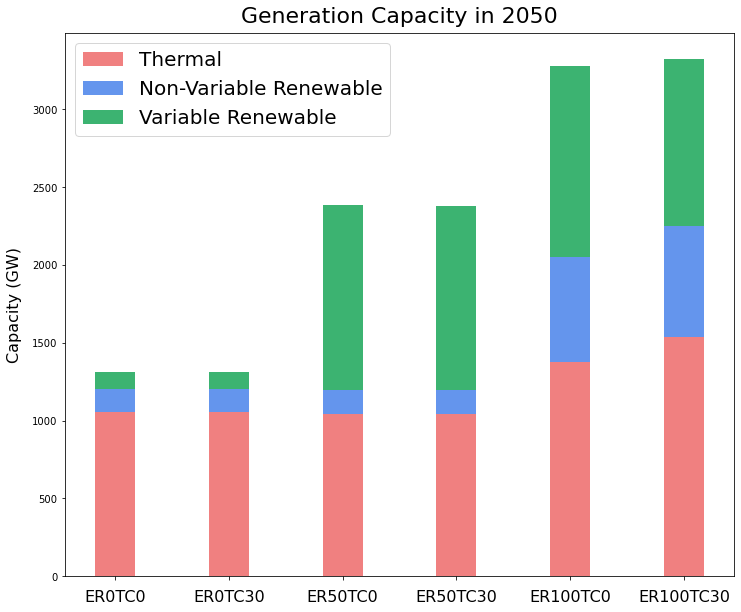

In [33]:
labels = scenarioFiles
varRenwValues = [ER0TC0[0],
             ER0TC30[0],
             ER50TC0[0],
             ER50TC30[0],
             ER100TC0[0],
             ER100TC30[0],
            ]
renwValues = [ER0TC0[1],
             ER0TC30[1],
             ER50TC0[1],
             ER50TC30[1],
             ER100TC0[1],
             ER100TC30[1],
            ]
thermValues = [ER0TC0[2],
             ER0TC30[2],
             ER50TC0[2],
             ER50TC30[2],
             ER100TC0[2],
             ER100TC30[2],
            ]

varRenwValues = np.array(varRenwValues)
renwValues = np.array(renwValues)
thermValues = np.array(thermValues)

width = 0.35

fig, ax = plt.subplots()

#ax.bar(labels, varRenwValues, width, label='Variable Renewable', color = 'mediumseagreen')
#ax.bar(labels, renwValues, width, label='Non-Variable Renewables', bottom = varRenwValues, color = 'cornflowerblue')
#ax.bar(labels, thermValues, width, label='Thermal', bottom = varRenwValues+renwValues, color = 'lightcoral')

ax.bar(labels, thermValues, width, label='Thermal', color = 'lightcoral')
ax.bar(labels, renwValues, width, label='Non-Variable Renewable', bottom = thermValues, color = 'cornflowerblue')
ax.bar(labels, varRenwValues, width, label='Variable Renewable', bottom = thermValues+renwValues, color = 'mediumseagreen')

ax.set_ylabel('Capacity (GW)',fontsize = 16, labelpad = 10)
ax.tick_params(axis='x', pad = 10, labelsize=16)
ax.set_title('Generation Capacity in 2050',fontsize = 22, pad = 10)
ax.legend(fontsize = 20)

fig.set_size_inches(12, 10)

plt.show()

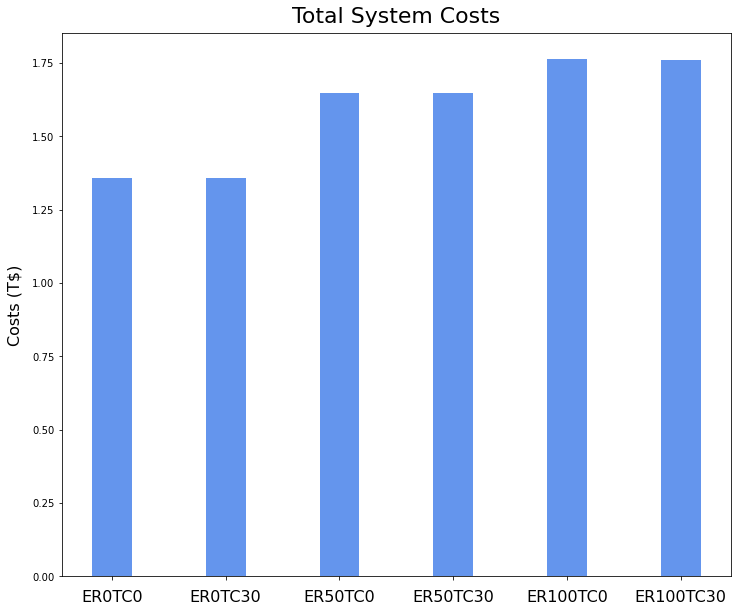

In [18]:
#COSTS
labels = scenarioFiles

#costs = {'ER0TC0':1.358,
#         'ER0TC30':1.358,
#         'ER50TC0':1.648,
#         'ER50TC30':1.647,
#         'ER100TC0':1.765,
#         'ER100TC30':1.759}

costs = [1.358, 1.358, 1.648, 1.647, 1.765, 1.759]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, costs, width, color = 'cornflowerblue')

ax.set_ylabel('Costs (T$)',fontsize = 16, labelpad = 10)
ax.tick_params(axis='x', pad = 10, labelsize=16)
ax.set_title('Total System Costs',fontsize = 22, pad = 10)

fig.set_size_inches(12, 10)

plt.show()

In [19]:
def generationResults(df, scenario):
    df = df.loc[df['Scenario']==scenario]
    dfNew = df.copy()
    dfNew['tech'] = df['t'].str[3:6]
    varRenw = dfNew.loc[(dfNew['tech']=='WND') | 
                     (dfNew['tech']=='SPV')]
    renw = df.loc[(dfNew['tech']=='HYD') | 
                  (dfNew['tech']=='BIO')]
    therm = df.loc[(dfNew['tech']=='CCG') | 
                   (dfNew['tech']=='CTG') |
                   (dfNew['tech']=='COA') | 
                   (dfNew['tech']=='COC') |
                   (dfNew['tech']=='URN')]
    outList = [varRenw['Production'].sum(),
               renw['Production'].sum(),
               therm['Production'].sum()]
    return outList

In [34]:
# Generation
dfgen = df_Total_Annual_ROA.copy()
ER0TC0 = generationResults(dfgen, 'ER0TC0')
ER0TC30 = generationResults(dfgen, 'ER0TC30')
ER50TC0 = generationResults(dfgen, 'ER50TC0')
ER50TC30 = generationResults(dfgen, 'ER50TC30')
ER100TC0 = generationResults(dfgen, 'ER100TC0')
ER100TC30 = generationResults(dfgen, 'ER100TC30')

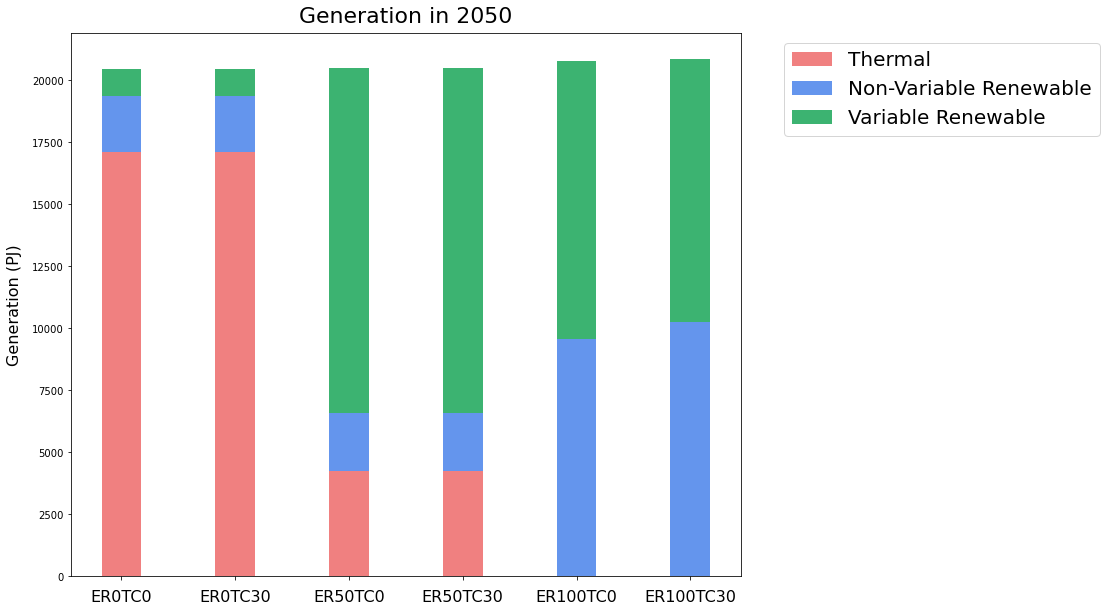

In [35]:
labels = scenarioFiles
varRenwValues = [ER0TC0[0],
             ER0TC30[0],
             ER50TC0[0],
             ER50TC30[0],
             ER100TC0[0],
             ER100TC30[0],
            ]
renwValues = [ER0TC0[1],
             ER0TC30[1],
             ER50TC0[1],
             ER50TC30[1],
             ER100TC0[1],
             ER100TC30[1],
            ]
thermValues = [ER0TC0[2],
             ER0TC30[2],
             ER50TC0[2],
             ER50TC30[2],
             ER100TC0[2],
             ER100TC30[2],
            ]

varRenwValues = np.array(varRenwValues)
renwValues = np.array(renwValues)
thermValues = np.array(thermValues)

width = 0.35

fig, ax = plt.subplots()

#ax.bar(labels, varRenwValues, width, label='Variable Renewable', color = 'mediumseagreen')
#ax.bar(labels, renwValues, width, label='Non-Variable Renewables', bottom = varRenwValues, color = 'cornflowerblue')
#ax.bar(labels, thermValues, width, label='Thermal', bottom = varRenwValues+renwValues, color = 'lightcoral')

ax.bar(labels, thermValues, width, label='Thermal', color = 'lightcoral')
ax.bar(labels, renwValues, width, label='Non-Variable Renewable', bottom = thermValues, color = 'cornflowerblue')
ax.bar(labels, varRenwValues, width, label='Variable Renewable', bottom = thermValues+renwValues, color = 'mediumseagreen')

ax.set_ylabel('Generation (PJ)',fontsize = 16, labelpad = 10)
ax.tick_params(axis='x', pad = 10, labelsize=16)
ax.set_title('Generation in 2050',fontsize = 22, pad = 10)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize = 20)

fig.set_size_inches(12, 10)

plt.show()

In [22]:
def emissionResults(df, scenario):
    df = df.loc[df['scenario']==scenario]
    value = df['AnnualTechnologyEmission'].sum()
    return value

In [23]:
# Generation
emission = df_emission.copy()
ER0TC0 = emissionResults(emission, 'ER0TC0')
ER0TC30 = emissionResults(emission, 'ER0TC30')
ER50TC0 = emissionResults(emission, 'ER50TC0')
ER50TC30 = emissionResults(emission, 'ER50TC30')
ER100TC0 = emissionResults(emission, 'ER100TC0')
ER100TC30 = emissionResults(emission, 'ER100TC30')

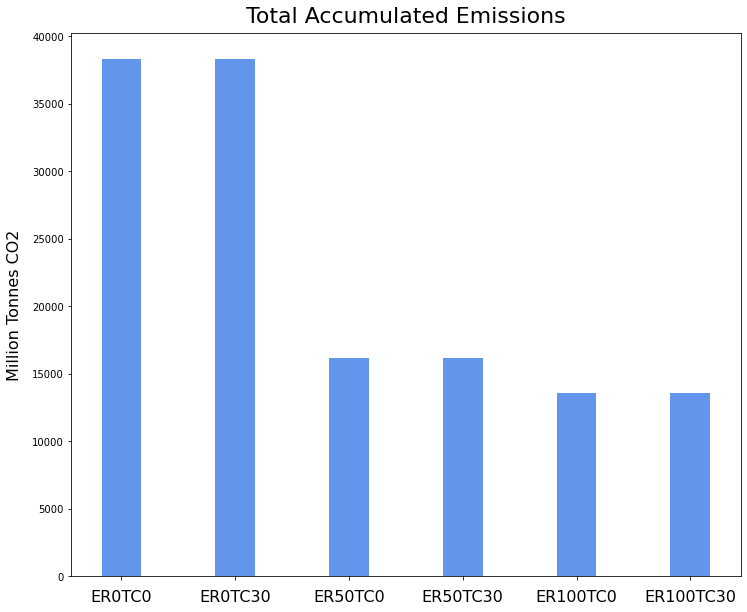

In [24]:
labels = scenarioFiles
values = [ER0TC0, ER0TC30, ER50TC0, ER50TC30, ER100TC0, ER100TC30]

width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, values, width, color = 'cornflowerblue')

ax.set_ylabel('Million Tonnes CO2',fontsize = 16, labelpad = 10)
ax.tick_params(axis='x', pad = 10, labelsize=16)
ax.set_title('Total Accumulated Emissions',fontsize = 22, pad = 10)

fig.set_size_inches(12, 10)

plt.show()